In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

![](spotify.png)

In [64]:
df=pd.read_csv('reviews.csv')

In [65]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This app is super great. I give it five stars+,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1,1,NaN


In [66]:
df.shape

(61594, 5)

In [67]:
df.drop(['Time_submitted','Total_thumbsup','Reply'],axis=1,inplace=True)

###### With this chart, I check whether there is missing data.

<AxesSubplot:>

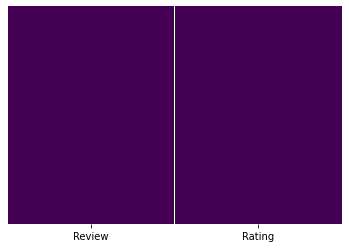

In [68]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
df_copy=df.copy()

In [70]:
def transform_ratings1(rating):
    if rating == 5:
        return "Excellent"
    if rating == 4:
        return "Good"
    if rating == 3:
        return "Average"
    if rating == 2 :
        return "Fair"
    if rating == 1:
        return "Poor"   

In [71]:
df['Rating'] = df['Rating'].apply(transform_ratings1)

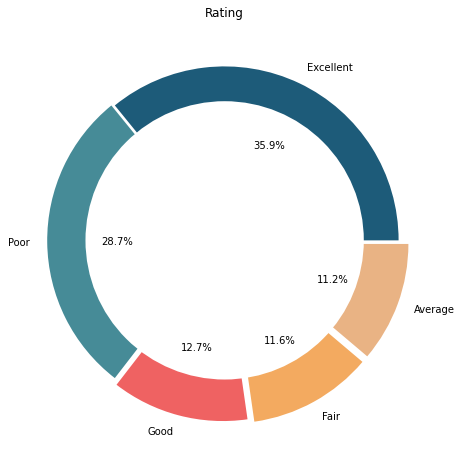

In [72]:
plt.figure(figsize=(8,8))
plt.pie(x=df['Rating'].value_counts(),labels=df['Rating'].value_counts().index,
        explode=[0,0.02,0.04,0.06,0.06],shadow=False,autopct='%1.1f%%',colors=['#1D5B79','#468B97','#EF6262','#F3AA60','#E9B384'])
plt.title('Rating')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)


In [17]:
df2 = df[['Review']].copy()

In [18]:
df2=df2["Review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Cleaning of Punctuation Marks

In [19]:
df2 = pd.DataFrame(df2, columns = ["Review"])

In [20]:
df2=df2['Review'].str.replace("[^\w\s]","",regex=True)

## Removing Numbers

In [21]:
df2=df2.str.replace("\d","",regex=True)

In [22]:
df2 = pd.DataFrame(df2, columns = ["Review"])

## Removing Stop Words

In [23]:
import nltk

In [24]:
from nltk.corpus import stopwords

In [25]:
sw = stopwords.words("english")

In [26]:
df2=df2["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [27]:
df2 = pd.DataFrame(df2, columns = ["Review"])

## Lemmatize

In [28]:
import textblob

In [29]:
from textblob import Word

In [31]:
df2= df2['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [32]:
df2 = pd.DataFrame(df2, columns = ["Review"])

## Splitting  The Data

In [33]:
X = df2['Review']
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Label Encoding

In [34]:
label_encoder = LabelEncoder()
label_encoder .fit(y_train)

LabelEncoder()

In [35]:
y_train =label_encoder.transform(y_train)
y_test =label_encoder.transform(y_test)

## Count Vectorization 

In [36]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [37]:
x_train_count = vectorizer.transform(X_train)
x_test_count = vectorizer.transform(X_test)

## TF-IDF

In [38]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer()

In [39]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [40]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(2, 3))

In [41]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(X_train)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(X_test)

In [42]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [43]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(X_train)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(X_test)

## Sentiment Analysis with Machine Learning

###### Logistic Regression (Ordinal)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn import model_selection

In [46]:
from warnings import filterwarnings
filterwarnings('ignore')

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [121]:
log_model=LogisticRegression(solver='lbfgs')
log_model=log_model.fit(x_train_count,y_train)
accuracy = model_selection.cross_val_score(log_model,x_test_count,y_test,cv = 10).mean()

print("Count Vectors Accuray Score:", accuracy)

Count Vectors Accuray Score: 0.5844452604854545


In [48]:
log_model1=LogisticRegression(solver='lbfgs')
log_model1=log_model1.fit(x_train_tf_idf_word,y_train)
accuracy1= model_selection.cross_val_score(log_model1,x_test_tf_idf_word,y_test,cv = 10).mean()

print("Word-Level TF-IDF Accuray Score:", accuracy1)

Word-Level TF-IDF Accuray Score: 0.6093367652241946


###### Naive Bayes 

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
nb_model=MultinomialNB()
nb_model=nb_model.fit(x_train_count,y_train)
accuracy = model_selection.cross_val_score(nb_model,x_test_count,y_test,cv = 10).mean()

print("Count Vectors Accuray Score:", accuracy)

Count Vectors Accuray Score: 0.5975303167035257


In [124]:
nb_model =MultinomialNB()
nb_model = nb_model.fit(x_train_tf_idf_word,y_train)
accuracy = model_selection.cross_val_score(nb_model,x_test_tf_idf_word, y_test, cv = 10).mean()

print("Word-Level TF-IDF Accuray Score:", accuracy)

Word-Level TF-IDF Accuray Score: 0.5887737421133967


In [125]:
nb_model=MultinomialNB()
nb_model = nb_model.fit(x_train_tf_idf_chars,y_train)
accuracy = model_selection.cross_val_score(nb_model,x_test_tf_idf_chars,y_test,cv = 10).mean()

print("CHARLEVEL Accuray Score:", accuracy)

CHARLEVEL Accuray Score: 0.5749985233799784


###### Random Forest

In [126]:
rf=RandomForestClassifier()

In [127]:
rf_model=rf.fit(x_train_count,y_train)
accuracy = model_selection.cross_val_score(rf_model,x_test_count,y_test,cv = 10).mean()

print("Count Vectors Accuray Score:", accuracy)

Count Vectors Accuray Score: 0.5854281326614792


In [128]:
rf =RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word,y_train)
accuracy = model_selection.cross_val_score(rf_model,x_test_tf_idf_word,y_test,cv = 10).mean()

print("Word-Level TF-IDF Accuray Score:", accuracy)

Word-Level TF-IDF Accuray Score: 0.5858214703455968


In [129]:
rf =RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_chars,y_train)
accuracy = model_selection.cross_val_score(rf_model,x_test_tf_idf_chars,y_test,cv = 10).mean()

print("CHARLEVEL Accuray Score:", accuracy)

CHARLEVEL Accuray Score: 0.5668318463850406


###### XGBOOST

In [130]:
import xgboost

In [131]:
from xgboost import XGBClassifier

In [132]:
xgb =XGBClassifier()
xgb_model = xgb.fit(x_train_count,y_train)
accuracy = model_selection.cross_val_score(xgb_model,x_test_count,y_test,cv = 10).mean()

print("Count Vectors Accuray Score:", accuracy)

Count Vectors Accuray Score: 0.5981695721384557


In [133]:
xgb =XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,y_train)
accuracy = model_selection.cross_val_score(xgb_model,x_test_tf_idf_word,y_test,cv = 10).mean()

print("Word-Level TF-IDF Accuray Score:", accuracy)

Word-Level TF-IDF Accuray Score: 0.5923645189026727


In [134]:
xgb =XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_chars,y_train)
accuracy = model_selection.cross_val_score(xgb_model,x_test_tf_idf_chars,y_test,cv = 10).mean()

print("CHARLEVEL Accuray Score:", accuracy)

CHARLEVEL Accuray Score: 0.5891187628538562


### TEST

In [49]:
test= TfidfVectorizer()
test.fit(X_train)

TfidfVectorizer()

In [61]:
test_reviews = ['This is a great app!', 'Uncomfortable UI, always lagging','I like the song selection, but the ads are annoying','I dont use this app','Premium opportunities are good but its expensive']
pred = log_model1.predict(test.transform(test_reviews))
pred_transformed = label_encoder.inverse_transform(pred).tolist()

In [62]:
result = pd.DataFrame({'Reviews':test_reviews, 
                       'Outcome': pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Excellent
1,"Uncomfortable UI, always lagging",Poor
2,"I like the song selection, but the ads are annoying",Average
3,I dont use this app,Poor
4,Premium opportunities are good but its expensive,Good
